# ADASYN

- Creates new samples by interpolation of samples of the minority class and its closest neighbours. It creates more samples from samples that are harder to classify.
- The main difference between SMOTE and ADASYN is that while training with knn, observations from the majority class are also considered in ADASYN which is not in the case of SMOTE where only observations from minority class are being considered.
- This also means, all samples are used in fitting the KNN
- add a weighting factor while generating the number of new samples per observation in the minority based on the number of observations from the majority class
- r (weighting rate) for an observation of a minority class = No. of neighbours from majority class / KNN value
- ADASYN tries to generate new samples that are basically harder to classify or say samples that lies in the boundary between the classes

In [1]:
# import libraries

import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn 
from sklearn.datasets import make_blobs

# from imblearn
from imblearn.over_sampling import ADASYN

In [19]:
# creating toy dataset

X, y = make_blobs(n_samples=1600, n_features=2, centers=[(0,0),(5,5)], random_state= 42,  cluster_std=1.5)

X.shape, y.shape

((1600, 2), (1600,))

In [20]:
set(y)

{0, 1}

In [21]:
# creating a data frame 

X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

In [22]:
y.value_counts()

0    800
1    800
dtype: int64

In [23]:
# now, under sample the data for y ==1 
X = pd.concat([X[y == 0], X[y==1].sample(200, random_state=42)], axis = 0)

y = y.loc[X.index]

# display the shape
X.shape, y.shape

((1000, 2), (1000,))

In [24]:
# check the value counts for the target class
y.value_counts()

0    800
1    200
dtype: int64

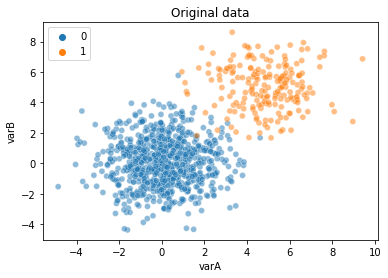

In [25]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

## ADASYN

[ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

In [26]:
# create ADASYN object

ada = ADASYN(sampling_strategy='auto', # samples from the minority class-- this is default
                        random_state=0,
             n_neighbors=5,
             n_jobs=2) 

X_resampled, y_resampled = ada.fit_resample(X,y)
X_resampled.shape, y_resampled.shape

((1600, 2), (1600,))

In [27]:
# original data shape
X.shape, y.shape

((1000, 2), (1000,))

In [28]:
# balance values
# original data
y.value_counts()

0    800
1    200
dtype: int64

In [29]:
y_resampled.value_counts()

0    800
1    800
dtype: int64

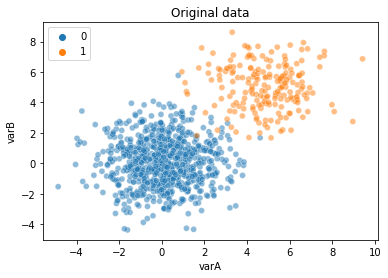

In [30]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

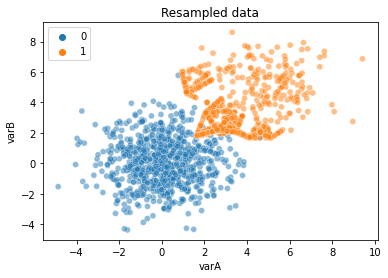

In [31]:
# plot the resampled data

# plot the original data

sns.scatterplot(data = X_resampled, x = 'varA', y = 'varB', hue = y_resampled, alpha=0.5)
plt.title('Resampled data')
plt.show()

- Here we can see more and new observations from the minority class - Class 1
- Also, we can see new observations majorly around the boundary with the majority class
- This is because ADASYN tries to generates new samples that are basically harder to classify OR we can say that majorly lies in the border between the classes

## Multi Class Data

In [32]:
# create a multi class dataset

X, y = make_blobs(n_samples=1600,
           n_features=3,
           cluster_std=1.5,
           centers=[(0,0),(5,5),(-1,5)],
           random_state=42)

X.shape, y.shape

((1600, 2), (1600,))

In [33]:
# convert into a DataFrame and series
X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# concat
X = pd.concat([X[y==0],
             X[y==1].sample(100, random_state=42),
             X[y==2].sample(100, random_state=42)],
             axis = 0)
y = y.loc[X.index]

X.shape, y.shape

((734, 2), (734,))

In [34]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

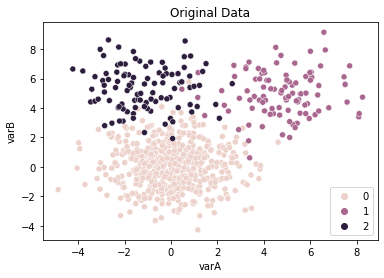

In [35]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y)
plt.title('Original Data')
plt.show

In [37]:
## Perform Random Oversampling

ada = ADASYN(sampling_strategy='not majority', # samples from all class except the majority one
                       random_state=0,
             n_neighbors=5,
             n_jobs=2)

X_res, y_res = ada.fit_resample(X,y)
X_res.shape, y_res.shape

((1598, 2), (1598,))

- Here we can see 1598 total observations as there could be some space of errors while generating the new samples as generating new samples is based on some numeric weighting rate 

In [38]:
y_res.value_counts()

0    534
1    532
2    532
dtype: int64

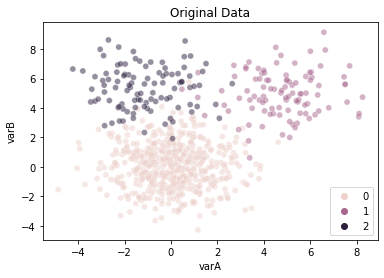

In [39]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y, alpha = 0.5)
plt.title('Original Data')
plt.show()

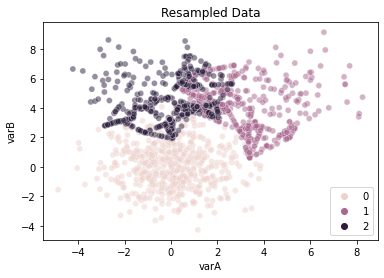

In [40]:
# Resampled

sns.scatterplot(data = X_res, x = 'varA', y ='varB', hue = y_res, alpha = 0.5)
plt.title('Resampled Data')
plt.show()

- Similarly, we can see new and more observations for classes 1 and 2 which contains over sampled observations